In [ ]:
# Variance Independence Check
# Analyzing whether the variance of log-perplexity depends on the detector model P

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import analysis_utils
importlib.reload(analysis_utils)
from analysis_utils import extract_info_from_path


In [3]:
# Dataset paths
wiki_paths = [
    ["../Responses/wiki_Llama3.1_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/wiki_Falcon_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/wiki_human_text_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/wiki_gpt_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/wiki_R1_clean_none_Meta-Llama-3.1-8B-Instruct.csv"],
    ["../Responses/wiki_Llama3.1_clean_none_falcon-7b.csv",
     "../Responses/wiki_Falcon_clean_none_falcon-7b.csv",
     "../Responses/wiki_human_text_none_falcon-7b.csv",
     "../Responses/wiki_gpt_clean_none_falcon-7b.csv",
     "../Responses/wiki_R1_clean_none_falcon-7b.csv"],
    ["../Responses/wiki_Llama3.1_clean_none_phi-2.csv",
     "../Responses/wiki_Falcon_clean_none_phi-2.csv",
     "../Responses/wiki_human_text_none_phi-2.csv",
     "../Responses/wiki_gpt_clean_none_phi-2.csv",
     "../Responses/wiki_R1_clean_none_phi-2.csv"],
    ["../Responses/wiki_Llama3.1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/wiki_Falcon_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/wiki_human_text_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/wiki_gpt_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/wiki_R1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv"]
]

news_paths = [
    ["../Responses/news_Llama3.1_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/news_Falcon_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/news_human_text_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/news_gpt_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/news_R1_clean_none_Meta-Llama-3.1-8B-Instruct.csv"],
    ["../Responses/news_Llama3.1_clean_none_falcon-7b.csv",
     "../Responses/news_Falcon_clean_none_falcon-7b.csv",
     "../Responses/news_human_text_none_falcon-7b.csv",
     "../Responses/news_gpt_clean_none_falcon-7b.csv",
     "../Responses/news_R1_clean_none_falcon-7b.csv"],
    ["../Responses/news_Llama3.1_clean_none_phi-2.csv",
     "../Responses/news_Falcon_clean_none_phi-2.csv",
     "../Responses/news_human_text_none_phi-2.csv",
     "../Responses/news_gpt_clean_none_phi-2.csv",
     "../Responses/news_R1_clean_none_phi-2.csv"],
    ["../Responses/news_Llama3.1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/news_Falcon_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/news_human_text_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/news_gpt_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/news_R1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv"]
]

abstracts_paths = [
    ["../Responses/abstracts_Llama3.1_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/abstracts_Falcon_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/abstracts_human_text_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/abstracts_gpt_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
     "../Responses/abstracts_R1_clean_none_Meta-Llama-3.1-8B-Instruct.csv"],
    ["../Responses/abstracts_Llama3.1_clean_none_falcon-7b.csv",
     "../Responses/abstracts_Falcon_clean_none_falcon-7b.csv",
     "../Responses/abstracts_human_text_none_falcon-7b.csv",
     "../Responses/abstracts_gpt_clean_none_falcon-7b.csv",
     "../Responses/abstracts_R1_clean_none_falcon-7b.csv"],
    ["../Responses/abstracts_Llama3.1_clean_none_phi-2.csv",
     "../Responses/abstracts_Falcon_clean_none_phi-2.csv",
     "../Responses/abstracts_human_text_none_phi-2.csv",
     "../Responses/abstracts_gpt_clean_none_phi-2.csv",
     "../Responses/abstracts_R1_clean_none_phi-2.csv"],
    ["../Responses/abstracts_Llama3.1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/abstracts_Falcon_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/abstracts_human_text_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/abstracts_gpt_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
     "../Responses/abstracts_R1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv"]
]


## Variance Independence Check

**Question**: Is the variance of log-perplexity independent of the detector model P?

**Setup**: For each (domain, author G, sentence length bin), we compute Var(log-ppx) under each detector P.
If variance is independent of P, these values should be similar across detectors.

**Metric**: Variance Ratio = max(variances) / min(variances)
- Ratio ≈ 1: variances are nearly identical across detectors
- Ratio < 2: variances are similar (reasonable homogeneity)
- Ratio > 2: variances differ substantially across detectors

**Binning**: Sentence lengths grouped in 5-word intervals (0-5, 5-10, ..., 40+)

**Minimum samples**: n ≥ 60 per bin to ensure reliable variance estimates


In [7]:
# Analysis Methods

MIN_SAMPLES = 60  # Minimum samples per bin for reliable variance estimates

def analyze_variance_by_author_length(dataset_paths, dataset_name):
    """
    Compute variance of log-ppx for each (author, sentence length bin) under each detector P.
    Returns the max/min variance ratio to measure consistency across detectors.
    """
    bins = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, float('inf'))]
    bin_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40+']
    
    # Extract detector and author names from file paths
    detector_names = []
    author_names = []
    for lm_paths in dataset_paths:
        _, _, lm_name, _ = extract_info_from_path(lm_paths[0])
        short_name = lm_name.replace(' ', '')[:8]
        detector_names.append(short_name)
    
    for path in dataset_paths[0]:
        _, author, _, _ = extract_info_from_path(path)
        author_names.append(author.split()[0])
    
    # Load response data for each detector and author
    detector_data = {}
    for det_idx, lm_paths in enumerate(dataset_paths):
        det_name = detector_names[det_idx]
        detector_data[det_name] = {}
        for auth_idx, path in enumerate(lm_paths):
            auth_name = author_names[auth_idx]
            df = pd.read_csv(path)[['length', 'response']]
            detector_data[det_name][auth_name] = df
    
    # Compute variance for each combination
    results = []
    for auth_name in author_names:
        for bin_idx, (low, high) in enumerate(bins):
            label = bin_labels[bin_idx]
            row = {'Author': auth_name, 'Length': label}
            variances = []
            n_samples = None
            
            for det_name in detector_names:
                df = detector_data[det_name][auth_name]
                subset = df[(df['length'] >= low) & (df['length'] < high)]['response'].dropna()
                
                if n_samples is None:
                    n_samples = len(subset)
                
                if len(subset) >= MIN_SAMPLES:
                    var_val = subset.var()
                    row[f'Var({det_name})'] = round(var_val, 4)
                    variances.append(var_val)
                else:
                    row[f'Var({det_name})'] = np.nan
            
            row['N'] = n_samples
            
            # Compute max/min ratio if we have valid variances
            if len(variances) >= 2:
                variances = np.array(variances)
                row['Ratio'] = round(variances.max() / variances.min(), 2)
            else:
                row['Ratio'] = np.nan
            
            results.append(row)
    
    return pd.DataFrame(results), detector_names, author_names


def plot_ratio_line_by_author(results_df, dataset_name, ax):
    """Line plot showing variance ratio across sentence lengths for each author."""
    authors = results_df['Author'].unique()
    lengths = results_df['Length'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(authors)))
    
    for i, author in enumerate(authors):
        author_data = results_df[results_df['Author'] == author]
        ratios = author_data['Ratio'].values
        ax.plot(range(len(lengths)), ratios, marker='o', label=author, color=colors[i], linewidth=2, markersize=6)
    
    ax.axhline(y=2, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    ax.set_xticks(range(len(lengths)))
    ax.set_xticklabels(lengths, rotation=45, ha='right', fontsize=9)
    ax.set_xlabel('Sentence Length (words)', fontsize=10)
    ax.set_ylabel('Variance Ratio (max/min)', fontsize=10)
    ax.set_title(f'{dataset_name}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8, loc='upper right', title='Authors')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(1, None)


def plot_ratio_heatmap(results_df, dataset_name, ax):
    """Heatmap showing variance ratio by author and sentence length."""
    authors = results_df['Author'].unique()
    lengths = results_df['Length'].unique()
    
    pivot = results_df.pivot(index='Author', columns='Length', values='Ratio')
    pivot = pivot[lengths]
    
    im = ax.imshow(pivot.values, cmap='RdYlGn_r', aspect='auto', vmin=1, vmax=4)
    
    ax.set_xticks(range(len(lengths)))
    ax.set_xticklabels(lengths, rotation=45, ha='right', fontsize=9)
    ax.set_yticks(range(len(authors)))
    ax.set_yticklabels(authors, fontsize=9)
    ax.set_xlabel('Sentence Length (words)', fontsize=10)
    ax.set_title(f'{dataset_name}', fontsize=11, fontweight='bold')
    
    # Add value annotations
    for i in range(len(authors)):
        for j in range(len(lengths)):
            val = pivot.iloc[i, j]
            if not np.isnan(val):
                ax.text(j, i, f'{val:.1f}', ha='center', va='center', fontsize=8, color='black')
    
    return im


def identify_outlier_detector(results_df):
    """Count how often each detector has the highest or lowest variance."""
    var_cols = [c for c in results_df.columns if c.startswith('Var(')]
    
    max_counts = {d: 0 for d in var_cols}
    min_counts = {d: 0 for d in var_cols}
    
    for _, row in results_df.iterrows():
        vars_row = row[var_cols].dropna()
        if len(vars_row) >= 2:
            max_counts[vars_row.idxmax()] += 1
            min_counts[vars_row.idxmin()] += 1
    
    print("Times each detector had HIGHEST variance:")
    for d, count in sorted(max_counts.items(), key=lambda x: -x[1]):
        print(f"  {d}: {count}")
    
    print("\nTimes each detector had LOWEST variance:")
    for d, count in sorted(min_counts.items(), key=lambda x: -x[1]):
        print(f"  {d}: {count}")


Variance Independence Check
Ratio = max(variance) / min(variance) across detectors
Ratio ~ 1: similar variances | Ratio < 2: acceptable | Ratio > 2: substantial difference

--- Wiki ---
  Author Length  Var(Metallam)  Var(Falcon7b)  Var(Phi2)  Var(Deepseek)    N  Ratio
Llama3.1    0-5         3.4884            NaN        NaN         5.2320   60   1.50
Llama3.1   5-10         0.8465         0.8317     0.9881         2.3285  137   2.80
Llama3.1  10-15         0.3048         0.3222     0.2699         0.7736 1246   2.87
Llama3.1  15-20         0.2221         0.2425     0.2075         0.5738 4052   2.77
Llama3.1  20-25         0.1666         0.1986     0.1556         0.4438 5157   2.85
Llama3.1  25-30         0.1368         0.1763     0.1246         0.3733 3354   3.00
Llama3.1  30-35         0.1421         0.1828     0.1168         0.3471 1233   2.97
Llama3.1  35-40         0.1338         0.1707     0.1195         0.3354  336   2.81
Llama3.1    40+         0.0950         0.1397     0.1090  

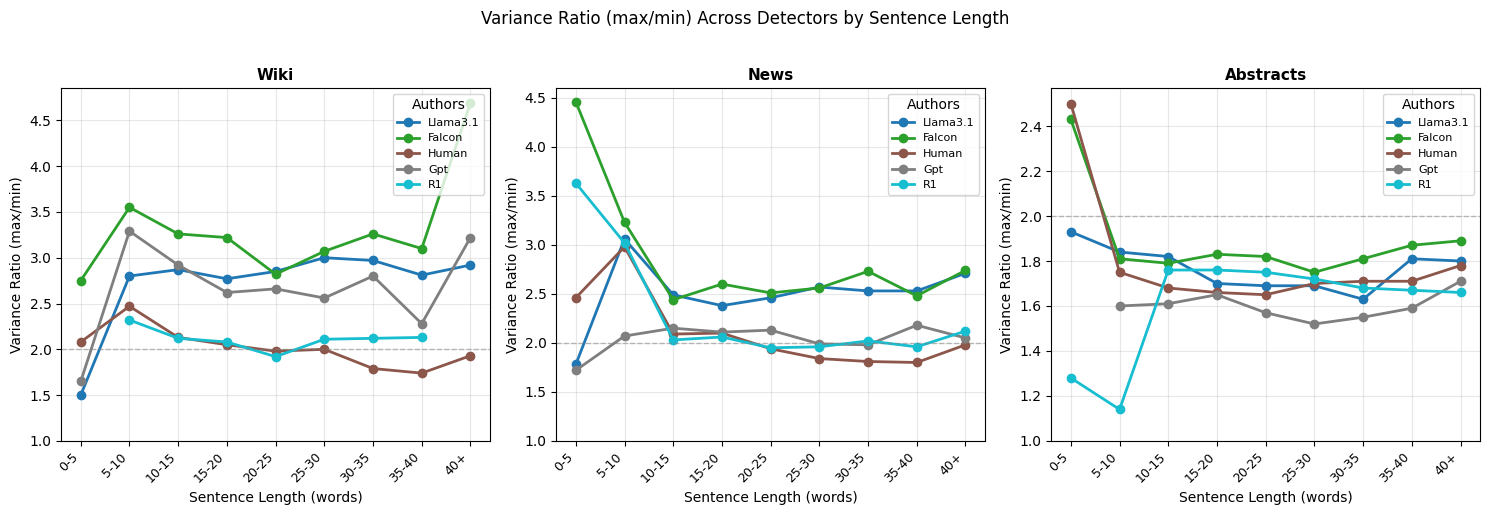

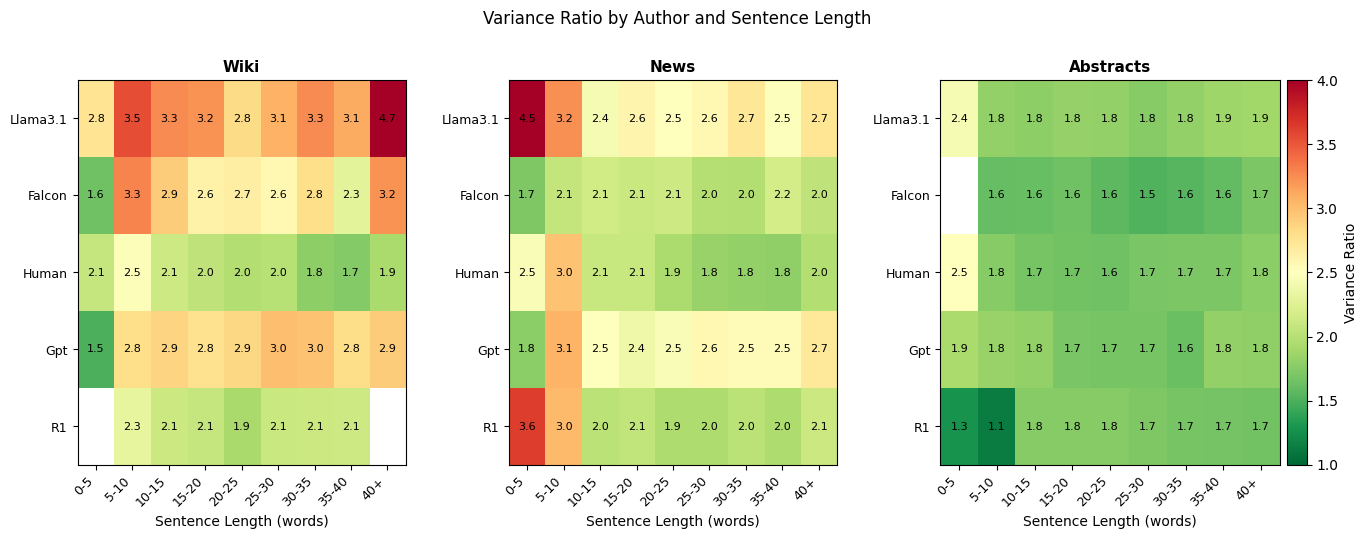


Summary: Mean and Median Variance Ratio by Dataset
Wiki         | Mean Ratio: 2.59 | Median Ratio: 2.66
News         | Mean Ratio: 2.36 | Median Ratio: 2.15
Abstracts    | Mean Ratio: 1.73 | Median Ratio: 1.71

Overall: Mean = 2.23, Median = 2.05
Median ratio >= 2 suggests variance differs noticeably across detectors.


In [8]:
# Run Variance Independence Analysis

print("="*90)
print("Variance Independence Check")
print("Ratio = max(variance) / min(variance) across detectors")
print("Ratio ~ 1: similar variances | Ratio < 2: acceptable | Ratio > 2: substantial difference")
print("="*90)

# Analyze each dataset
print("\n--- Wiki ---")
wiki_results, wiki_det, wiki_auth = analyze_variance_by_author_length(wiki_paths, "Wiki")
print(wiki_results.to_string(index=False))

print("\n--- News ---")
news_results, news_det, news_auth = analyze_variance_by_author_length(news_paths, "News")
print(news_results.to_string(index=False))

print("\n--- Abstracts ---")
abstracts_results, abstracts_det, abstracts_auth = analyze_variance_by_author_length(abstracts_paths, "Abstracts")
print(abstracts_results.to_string(index=False))

# Plot 1: Line plots showing variance ratio by sentence length
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_ratio_line_by_author(wiki_results, 'Wiki', axes[0])
plot_ratio_line_by_author(news_results, 'News', axes[1])
plot_ratio_line_by_author(abstracts_results, 'Abstracts', axes[2])
plt.suptitle('Variance Ratio (max/min) Across Detectors by Sentence Length', fontsize=12, y=1.02)
plt.tight_layout()
plt.savefig('images/variance_ratio_by_length.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 2: Heatmaps showing variance ratio by author and length
fig, axes = plt.subplots(1, 3, figsize=(16, 5), gridspec_kw={'width_ratios': [1, 1, 1.15]})
im1 = plot_ratio_heatmap(wiki_results, 'Wiki', axes[0])
im2 = plot_ratio_heatmap(news_results, 'News', axes[1])
im3 = plot_ratio_heatmap(abstracts_results, 'Abstracts', axes[2])

cbar = fig.colorbar(im3, ax=axes[2], orientation='vertical', fraction=0.08, pad=0.02)
cbar.set_label('Variance Ratio', fontsize=10)

plt.suptitle('Variance Ratio by Author and Sentence Length', fontsize=12, y=1.02)
plt.subplots_adjust(wspace=0.3)
plt.savefig('images/variance_ratio_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary statistics
print("\n" + "="*90)
print("Summary: Mean and Median Variance Ratio by Dataset")
print("="*90)
for name, df in [('Wiki', wiki_results), ('News', news_results), ('Abstracts', abstracts_results)]:
    mean_ratio = df['Ratio'].mean()
    median_ratio = df['Ratio'].median()
    print(f"{name:12} | Mean Ratio: {mean_ratio:.2f} | Median Ratio: {median_ratio:.2f}")

overall_mean = pd.concat([wiki_results['Ratio'], news_results['Ratio'], abstracts_results['Ratio']]).mean()
overall_median = pd.concat([wiki_results['Ratio'], news_results['Ratio'], abstracts_results['Ratio']]).median()
print(f"\nOverall: Mean = {overall_mean:.2f}, Median = {overall_median:.2f}")
if overall_median < 2:
    print("Median ratio < 2 suggests variance is reasonably consistent across detectors.")
else:
    print("Median ratio >= 2 suggests variance differs noticeably across detectors.")


In [9]:
# Identify which detector is the outlier

print("="*90)
print("Outlier Analysis: Which detector most often has extreme variance?")
print("="*90)

all_results = pd.concat([wiki_results, news_results, abstracts_results])
identify_outlier_detector(all_results)


Outlier Analysis: Which detector most often has extreme variance?
Times each detector had HIGHEST variance:
  Var(Deepseek): 126
  Var(Phi2): 5
  Var(Metallam): 1
  Var(Falcon7b): 0

Times each detector had LOWEST variance:
  Var(Falcon7b): 69
  Var(Metallam): 41
  Var(Phi2): 22
  Var(Deepseek): 0
